In [1]:
import os
import numpy as np
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt
import sys
from datetime import datetime
import matplotlib.ticker as ticker
import scipy as sc
import scipy.stats as stats
from scipy.optimize import curve_fit

## Выбираем файлы данных на которых будем проводить тестирование

In [5]:
input_directory = r'C:/TOWER_DATA/TEST/May/'
files = os.listdir(input_directory) #список файлов в папке с данными

## Склеиваем часовые файлы в один большой Df

In [6]:
data = pd.read_csv(input_directory+files[0], sep='\s+', usecols=[0,3,5,7,9], names=['date','u','v','w','T'], header=None)    
for i in files[1:67]:
    data1 = pd.read_csv(input_directory+i, sep='\s+', usecols=[0,3,5,7,9], names=['date','u','v','w','T'], header=None)    
    data=pd.concat([data, data1],ignore_index=True)

C:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data=data.replace('y=',np.nan)
data=data.replace('T=',np.nan)

In [8]:
data[-10:]

,date,u,v,w,T
4824131,200503185959,0.62,-0.73,-0.23,16.86
4824132,200503185959,0.57,-0.68,-0.23,16.87
4824133,200503185959,0.56,-0.7,-0.21,16.84
4824134,200503185959,0.61,-0.7,-0.22,16.87
4824135,200503185959,0.59,-0.65,-0.23,16.88
4824136,200503185959,0.58,-0.65,-0.26,16.87
4824137,200503185959,0.53,-0.6,-0.27,16.88
4824138,200503185959,0.57,-0.64,-0.27,16.87
4824139,200503185959,0.55,-0.65,-0.23,16.86
4824140,200503190000,0.61,-0.69,-0.22,16.84


In [9]:
data.shape

(4824141, 5)

## Проверяем на наличие пропусков

In [10]:
data.loc[data['T'].isna()]

,date,u,v,w,T
4654952,200503163900,NaN,NaN,NaN,NaN
4658231,200503164144,NaN,NaN,NaN,NaN
4671823,200503165304,NaN,NaN,NaN,NaN
4673158,200503165411,NaN,NaN,NaN,NaN


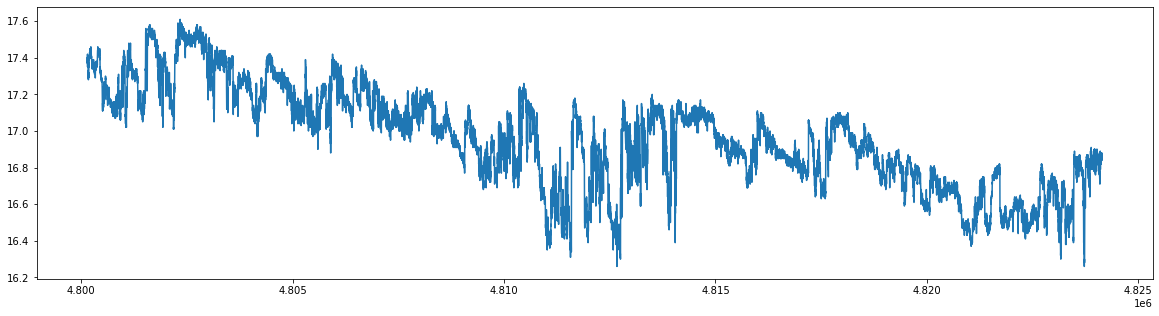

In [11]:
fig, ax1 = plt.subplots(figsize=(20, 5))
plt.plot(data['T'][-24000:])

## Делаем пропуски в Df

In [12]:
lg=1200 #длина пропуска 
index_e=np.arange(lg*2,len(data)-lg,lg*2)
index_s=index_e-lg
len(index_s) #количество пропусков

2009

In [13]:
data_gap=data.copy()
for i in range(len(index_s)):
    data_gap.loc[index_s[i]:index_e[i]-1,['T','w']]=np.nan

In [14]:
data_gap[3600000-24000:3600000] #смотрим 

,date,u,v,w,T
3576000,200503013954,0.38,-1.52,0.08,13.00
3576001,200503013954,0.62,-1.61,0.21,13.02
3576002,200503013954,0.58,-1.54,0.32,13.01
3576003,200503013954,0.55,-1.42,0.33,13.02
3576004,200503013954,0.6,-1.42,0.30,13.02
...,...,...,...,...,...
3599995,200503015954,0.53,0.05,NaN,NaN
3599996,200503015954,0.58,0.05,NaN,NaN
3599997,200503015954,0.54,0.05,NaN,NaN
3599998,200503015954,0.61,-0.02,NaN,NaN


C:\Users\user\AppData\Local\Temp/ipykernel_3288/4154704979.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','01:40:00','01:44:00','01:48:00','01:52:00','01:56:00','02:00:00'])


Text(0.5, 0, '$Time,$ $UTC$')

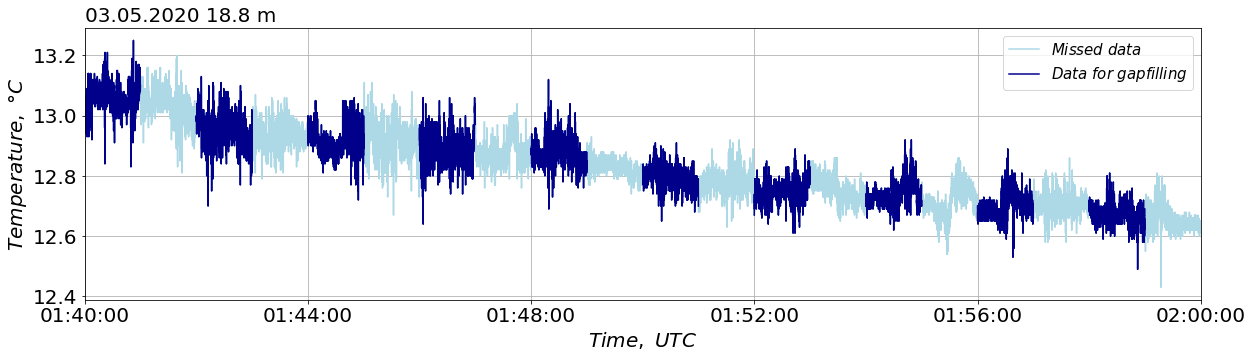

In [15]:
fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(data['T'][3600000-24000:3600000+1], label='$Missed$ $data$', color='lightblue')
ax1.plot(data_gap['T'][3600000-24000:3600000+1], label='$Data$ $for$ $gapfilling$', color='darkblue')
ax1.legend(fontsize=15)
ax1.grid()
ax1.margins(x=0)
ax1.tick_params(axis='both', labelsize=20) #, pad=40.0
ax1.xaxis.set_major_locator(ticker.MultipleLocator(4800))
ax1.set_xticklabels(['','01:40:00','01:44:00','01:48:00','01:52:00','01:56:00','02:00:00'])
ax1.set_title('03.05.2020 18.8 m', fontsize = 20,loc='left')
ax1.set_ylabel('$Temperature,$ $°С$', fontsize=20)#, labelpad=50
ax1.set_xlabel('$Time,$ $UTC$', fontsize=20) #, labelpad=30

C:\Users\user\AppData\Local\Temp/ipykernel_3288/3488780509.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','01:40:00','01:44:00','01:48:00','01:52:00','01:56:00','02:00:00'])


Text(0.5, 0, '$Time,$ $UTC$')

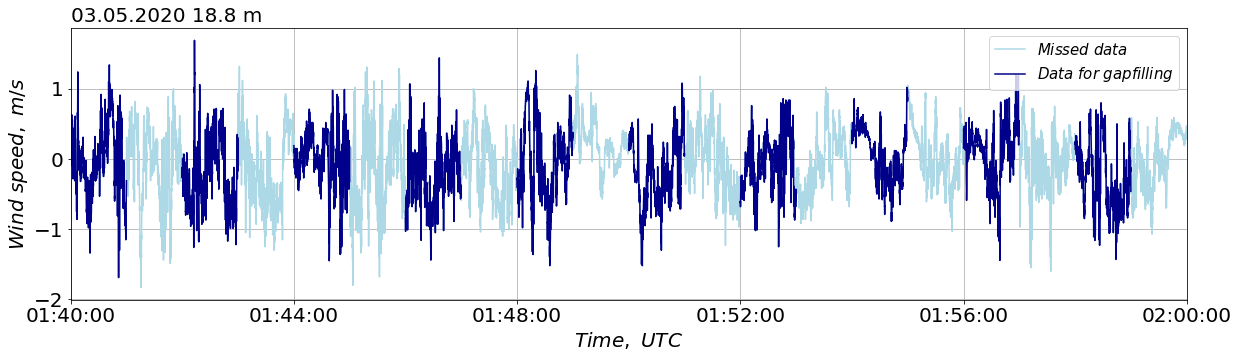

In [16]:
fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(data['w'][3600000-24000:3600000+1], label='$Missed$ $data$', color='lightblue')
ax1.plot(data_gap['w'][3600000-24000:3600000+1], label='$Data$ $for$ $gapfilling$', color='darkblue')
ax1.legend(fontsize=15)
ax1.grid()
ax1.margins(x=0)
ax1.tick_params(axis='both', labelsize=20) #, pad=40.0
ax1.xaxis.set_major_locator(ticker.MultipleLocator(4800))
ax1.set_xticklabels(['','01:40:00','01:44:00','01:48:00','01:52:00','01:56:00','02:00:00'])
ax1.set_title('03.05.2020 18.8 m', fontsize = 20,loc='left')
ax1.set_ylabel('$Wind$ $speed,$ $m/s$', fontsize=20)#, labelpad=50
ax1.set_xlabel('$Time,$ $UTC$', fontsize=20) #, labelpad=30

## Заполнение одного пропуска (для графиков)

In [262]:
i=-1
T_lin, W_lin = gapfilling('lin', data_gap, 'T', 'w', index_s[i], index_e[i])
T_lin_gaus, W_lin_gaus = gapfilling('lin_gaus', data_gap, 'T', 'w', index_s[i], index_e[i])
T_lin_cov, W_lin_cov = gapfilling('lin_cov', data_gap, 'T', 'w', index_s[i], index_e[i])
T_ma, W_ma = gapfilling('ma', data_gap, 'T', 'w', index_s[i], index_e[i])
T_ma_gaus, W_ma_gaus = gapfilling('ma_gaus', data_gap, 'T', 'w', index_s[i], index_e[i])
T_ma_cov, W_ma_cov = gapfilling('ma_cov', data_gap, 'T', 'w', index_s[i], index_e[i])
T_walk, W_walk = gapfilling('walk', data_gap, 'T', 'w', index_s[i], index_e[i])
T_walk_cov, W_walk_cov = gapfilling('walk_cov', data_gap, 'T', 'w', index_s[i], index_e[i])
print(index_s[i], index_e[i])

3596400 3597600


In [263]:
std = np.zeros(1200)
for i in range(index_s[-1], index_e[-1]):
    std[i-index_s[-1]]=np.nanstd(data_gap['T'][i-lg:i+lg])
    

C:\Users\user\AppData\Local\Temp/ipykernel_5300/3319122896.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','01:56:00','01:56:30','01:57:00','01:57:30','01:58:00','01:58:30','01:59:00'])


Text(0.5, 0, '$Time,$ $UTC$')

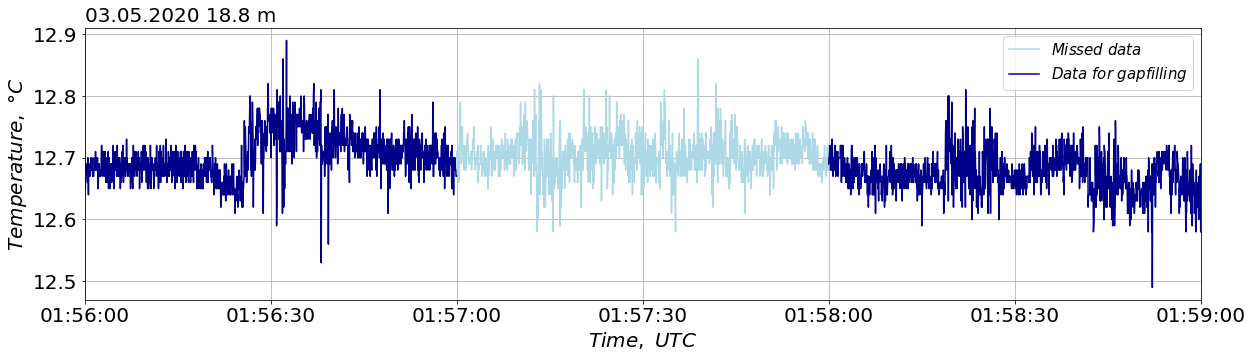

In [270]:
i=-1
fig, ax1 = plt.subplots(figsize=(20, 5))
T=data['T'][index_s[i]:index_e[i]]
ax1.plot(T, label='$Missed$ $data$', color='lightblue')
ax1.plot(data_gap['T'][index_s[i]-lg:index_e[i]+lg+1], label='$Data$ $for$ $gapfilling$', color='darkblue')

ax1.legend(fontsize=15)
ax1.grid()
ax1.margins(x=0)
ax1.tick_params(axis='both', labelsize=20) #, pad=40.0
ax1.xaxis.set_major_locator(ticker.MultipleLocator(600))
ax1.set_xticklabels(['','01:56:00','01:56:30','01:57:00','01:57:30','01:58:00','01:58:30','01:59:00'])
ax1.set_title('03.05.2020 18.8 m', fontsize = 20,loc='left')
ax1.set_ylabel('$Temperature,$ $°С$', fontsize=20)#, labelpad=50
ax1.set_xlabel('$Time,$ $UTC$', fontsize=20) #, labelpad=30

C:\Users\user\AppData\Local\Temp/ipykernel_5300/3661364207.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','01:57:00','01:57:10','01:57:20','01:57:30','01:57:40','01:57:50','01:58:00'])


Text(0.5, 0, '$Time,$ $UTC$')

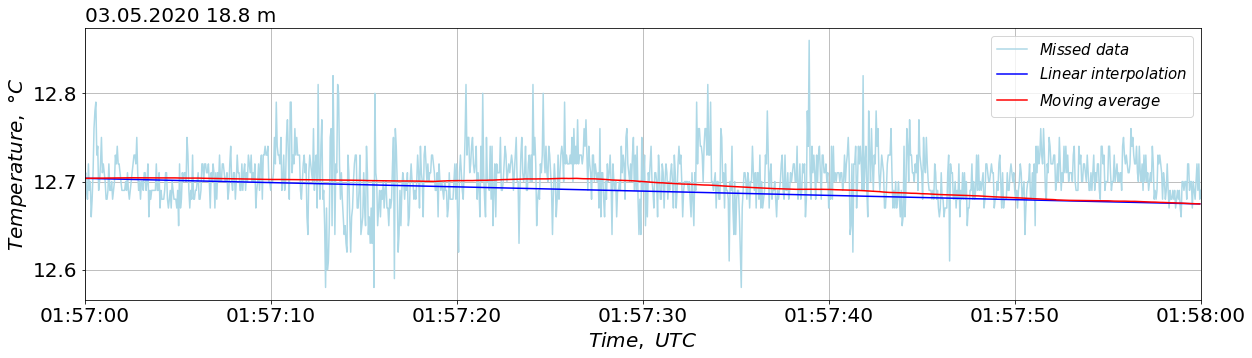

In [271]:
i=-1
fig, ax1 = plt.subplots(figsize=(20, 5))
T=data['T'][index_s[i]:index_e[i]+1].values
ax1.plot(T, label='$Missed$ $data$', color='lightblue')
#ax1.plot(data_gap['T'][index_s[i]-lg:index_e[i]+lg].values, label='$Data$ $for$ $gapfilling$', color='darkblue')

ax1.plot(T_lin, label='$Linear$ $interpolation$', color='blue')
ax1.plot(T_ma, label='$Moving$ $average$', color='red')

ax1.legend(fontsize=15)
ax1.grid()
ax1.margins(x=0)
ax1.tick_params(axis='both', labelsize=20) #, pad=40.0
ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax1.set_xticklabels(['','01:57:00','01:57:10','01:57:20','01:57:30','01:57:40','01:57:50','01:58:00'])
ax1.set_title('03.05.2020 18.8 m', fontsize = 20,loc='left')
ax1.set_ylabel('$Temperature,$ $°С$', fontsize=20)#, labelpad=50
ax1.set_xlabel('$Time,$ $UTC$', fontsize=20) #, labelpad=30

C:\Users\user\AppData\Local\Temp/ipykernel_5300/3274549084.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','01:57:00','01:57:10','01:57:20','01:57:30','01:57:40','01:57:50','01:58:00'])


Text(0.5, 0, '$Time,$ $UTC$')

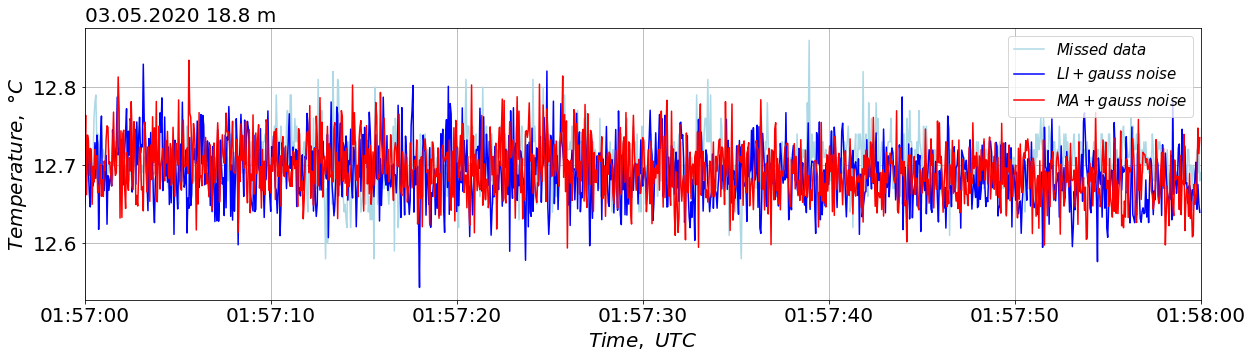

In [281]:
i=-1
fig, ax1 = plt.subplots(figsize=(20, 5))
T=data['T'][index_s[i]:index_e[i]+1].values
ax1.plot(T, label='$Missed$ $data$', color='lightblue')
#ax1.plot(data_gap['T'][index_s[i]-lg:index_e[i]+lg], label='$Data$ $for$ $gapfilling$', color='darkblue')

ax1.plot(T_lin_gaus, label='$LI+gauss$ $noise$', color='blue')
ax1.plot(T_ma_gaus, label='$MA+gauss$ $noise$', color='red')

ax1.legend(fontsize=15)
ax1.grid()
ax1.margins(x=0)
ax1.tick_params(axis='both', labelsize=20) #, pad=40.0
ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax1.set_xticklabels(['','01:57:00','01:57:10','01:57:20','01:57:30','01:57:40','01:57:50','01:58:00'])
ax1.set_title('03.05.2020 18.8 m', fontsize = 20,loc='left')
ax1.set_ylabel('$Temperature,$ $°С$', fontsize=20)#, labelpad=50
ax1.set_xlabel('$Time,$ $UTC$', fontsize=20) #, labelpad=30

C:\Users\user\AppData\Local\Temp/ipykernel_5300/3224183064.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','01:57:00','01:57:10','01:57:20','01:57:30','01:57:40','01:57:50','01:58:00'])


Text(0.5, 0, '$Time,$ $UTC$')

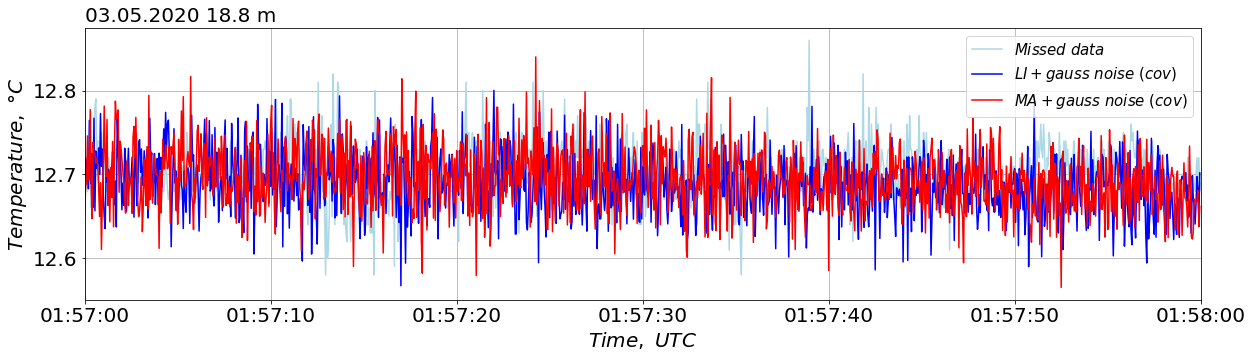

In [280]:
i=-1
fig, ax1 = plt.subplots(figsize=(20, 5))
T=data['T'][index_s[i]:index_e[i]+1].values
ax1.plot(T, label='$Missed$ $data$', color='lightblue')
#ax1.plot(data_gap['T'][index_s[i]-lg:index_e[i]+lg], label='$Data$ $for$ $gapfilling$', color='darkblue')

ax1.plot(T_lin_cov, label='$LI+gauss$ $noise$ $(cov)$', color='blue')
ax1.plot(T_ma_cov, label='$MA+gauss$ $noise$ $(cov)$', color='red')

ax1.legend(fontsize=15)
ax1.grid()
ax1.margins(x=0)
ax1.tick_params(axis='both', labelsize=20) #, pad=40.0
ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax1.set_xticklabels(['','01:57:00','01:57:10','01:57:20','01:57:30','01:57:40','01:57:50','01:58:00'])
ax1.set_title('03.05.2020 18.8 m', fontsize = 20,loc='left')
ax1.set_ylabel('$Temperature,$ $°С$', fontsize=20)#, labelpad=50
ax1.set_xlabel('$Time,$ $UTC$', fontsize=20) #, labelpad=30

C:\Users\user\AppData\Local\Temp/ipykernel_5300/1342705840.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','01:57:00','01:57:10','01:57:20','01:57:30','01:57:40','01:57:50','01:58:00'])


Text(0.5, 0, '$Time,$ $UTC$')

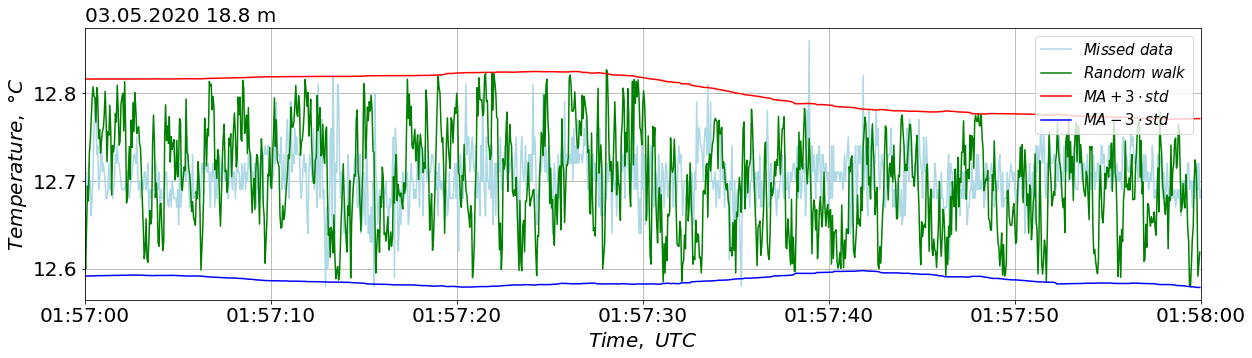

In [282]:

i=-1
fig, ax1 = plt.subplots(figsize=(20, 5))
T=data['T'][index_s[i]:index_e[i]+1].values
ax1.plot(T, label='$Missed$ $data$', color='lightblue')
#ax1.plot(data_gap['T'][index_s[i]-lg:index_e[i]+lg], label='$Data$ $for$ $gapfilling$', color='darkblue')

ax1.plot(T_walk, label='$Random$ $walk$', color='green')

ax1.plot(T_ma+3*std, label='$MA+3 \cdot std$', color='red')
ax1.plot(T_ma-3*std, label='$MA-3 \cdot std$', color='blue')

ax1.legend(fontsize=15)
ax1.grid()
ax1.margins(x=0)
ax1.tick_params(axis='both', labelsize=20) #, pad=40.0
ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax1.set_xticklabels(['','01:57:00','01:57:10','01:57:20','01:57:30','01:57:40','01:57:50','01:58:00'])
ax1.set_title('03.05.2020 18.8 m', fontsize = 20,loc='left')
ax1.set_ylabel('$Temperature,$ $°С$', fontsize=20)#, labelpad=50
ax1.set_xlabel('$Time,$ $UTC$', fontsize=20) #, labelpad=30

# Заполнение пропусков на большой выборке 

## Расчет статистик по начальному и незаполненному ряду

In [132]:
mean_time = 20
mean_time = mean_time*20*60
output_directory=r'C:/TOWER_DATA/TEST/gap_2400/'

# file_T = open(output_directory+f'T_gap_{mean_time}.csv','w')
# file_W = open(output_directory+f'W_gap_{mean_time}.csv','w')
# file_WT = open(output_directory+f'WT_gap_{mean_time}.csv','w')

file_T = open(output_directory+f'T.csv','w')
file_W = open(output_directory+f'W.csv','w')


print('mean', 'std', 'acor', 'max', 'min', file=file_T)
print('mean', 'std', 'acor', 'max', 'min', file=file_W)
    
# for i in range (mean_time, len(data_gap), mean_time):
#     T_new = data_gap.loc[i-mean_time:i-1,'T'].values
#     W_new = data_gap.loc[i-mean_time:i-1,'w'].values
#     gap_stat(T_new, file_T)
#     gap_stat(W_new, file_W)
#     f_WT(W_new, T_new, file_WT)
    
for i in range(len(index_s)):
    T_new = data.loc[index_s[i]:index_e[i]-1,'T'].values 
    W_new = data.loc[index_s[i]:index_e[i]-1,'w'].values
    gap_stat(T_new, file_T)
    gap_stat(W_new, file_W)

file_T.close()
file_W.close()
file_WT.close()

## Расчет статистик по восстановленным рядам

In [18]:
mean_time=20
mean_time = mean_time*20*60
output_directory=r'C:/TOWER_DATA/TEST/gap_1200/'
test_list=['lin','lin_gaus','lin_cov','ma','ma_gaus','ma_cov','walk','walk_cov'] # 

for name in test_list:
    print(name)
    data_new=data_gap.copy()
    
    #раскоментить, если нужна статистика по пропускам
    #file_T1 = open(output_directory+f'T_{name}.csv','w')
    #file_W1 = open(output_directory+f'W_{name}.csv','w') 
    #print('mean', 'std', 'acor', 'max', 'min', file=file_T1)
    #print('mean', 'std', 'acor', 'max', 'min', file=file_W1)
    
    
    #file_T = open(output_directory+f'T_{name}_{mean_time}.csv','w')
    #file_W = open(output_directory+f'W_{name}_{mean_time}.csv','w') 
    #file_WT = open(output_directory+f'WT_{name}_{mean_time}.csv','w')
    #print('mean', 'std', 'acor', 'max', 'min', file=file_T)
    #print('mean', 'std', 'acor', 'max', 'min', file=file_W)
    #print('WT', file=file_WT)
    
    
    T_R2 = open(output_directory+f'T_{name}_{mean_time}_R2.csv','w')
    W_R2 = open(output_directory+f'W_{name}_{mean_time}_R2.csv','w') 
    print('R2', file=T_R2)
    print('R2', file=W_R2)
    
    
    for i in range(len(index_s)):
        
        T_new, W_new = gapfilling(name, data_gap, 'T', 'w', index_s[i], index_e[i])
        
        #раскоментить, если нужна статистика по пропускам
        #gap_stat(T_new, file_T1)
        #gap_stat(W_new, file_W1)
        
        #раскоментить, если нужна статистика по периодам осреднения
        data_new.loc[index_s[i]:index_e[i]-1,'T'] = T_new 
        data_new.loc[index_s[i]:index_e[i]-1,'w'] = W_new
        
        if i%100==0: print('Заполнено пропусков:', i*100/len(index_s), '%')
    #раскоментить, если нужна статистика по периодам осреднения
    k=0
    for i in range (mean_time, len(data_new), mean_time):
        T_new = data_new.loc[i-mean_time:i-1,'T'].values
        W_new = data_new.loc[i-mean_time:i-1,'w'].values
        
        T = data.loc[i-mean_time:i-1,'T'].values
        W = data.loc[i-mean_time:i-1,'w'].values
        
        #gap_stat(T_new, file_T)
        #gap_stat(W_new, file_W)
        #f_WT(W_new, T_new, file_WT)
        print(np.corrcoef(T_new, T)[0,1], file=T_R2)
        print(np.corrcoef(W_new, W)[0,1], file=W_R2)
        
        k+=1
        if k%20==0: print('Обработано периодов осреднения:', k*100/(len(data_new)/mean_time), '%')
        
    T_R2.close()
    W_R2.close()
    #file_T1.close()
    #file_W1.close()
    
    #file_T.close()
    #file_W.close()
    #file_WT.close()

lin
Заполнено пропусков: 0.0 %
Заполнено пропусков: 4.9776007964161275 %
Заполнено пропусков: 9.955201592832255 %
Заполнено пропусков: 14.932802389248382 %
Заполнено пропусков: 19.91040318566451 %
Заполнено пропусков: 24.888003982080637 %
Заполнено пропусков: 29.865604778496763 %
Заполнено пропусков: 34.84320557491289 %
Заполнено пропусков: 39.82080637132902 %
Заполнено пропусков: 44.79840716774515 %
Заполнено пропусков: 49.77600796416127 %
Заполнено пропусков: 54.7536087605774 %
Заполнено пропусков: 59.73120955699353 %
Заполнено пропусков: 64.70881035340966 %
Заполнено пропусков: 69.68641114982579 %
Заполнено пропусков: 74.66401194624191 %
Заполнено пропусков: 79.64161274265804 %
Заполнено пропусков: 84.61921353907417 %
Заполнено пропусков: 89.5968143354903 %
Заполнено пропусков: 94.57441513190642 %
Заполнено пропусков: 99.55201592832255 %
Обработано периодов осреднения: 9.949957930334126 %
Обработано периодов осреднения: 19.89991586066825 %
Обработано периодов осреднения: 29.84987379

Заполнено пропусков: 0.0 %
Заполнено пропусков: 4.9776007964161275 %
Заполнено пропусков: 9.955201592832255 %
Заполнено пропусков: 14.932802389248382 %
Заполнено пропусков: 19.91040318566451 %
Заполнено пропусков: 24.888003982080637 %
Заполнено пропусков: 29.865604778496763 %
Заполнено пропусков: 34.84320557491289 %
Заполнено пропусков: 39.82080637132902 %
Заполнено пропусков: 44.79840716774515 %
Заполнено пропусков: 49.77600796416127 %
Заполнено пропусков: 54.7536087605774 %
Заполнено пропусков: 59.73120955699353 %
Заполнено пропусков: 64.70881035340966 %
Заполнено пропусков: 69.68641114982579 %
Заполнено пропусков: 74.66401194624191 %
Заполнено пропусков: 79.64161274265804 %
Заполнено пропусков: 84.61921353907417 %
Заполнено пропусков: 89.5968143354903 %
Заполнено пропусков: 94.57441513190642 %
Заполнено пропусков: 99.55201592832255 %
Обработано периодов осреднения: 9.949957930334126 %
Обработано периодов осреднения: 19.89991586066825 %
Обработано периодов осреднения: 29.849873791002

In [22]:
out_list = ['lin','lin_gaus','lin_cov','ma','ma_gaus','ma_cov','walk', 'walk_cov'] # 'gap',
mean = 24000
lg = 1200
output_directory = f'C:/TOWER_DATA/TEST/gap_{lg}/'
for name in out_list:
    T_R2 = pd.read_csv(output_directory+f'T_{name}_{mean}_R2.csv', sep=' ')
    W_R2 = pd.read_csv(output_directory+f'W_{name}_{mean}_R2.csv', sep=' ')
    
    T_R2['R2']=T_R2['R2']**2
    W_R2['R2']=W_R2['R2']**2
    
    print(f'Период осреднения: {mean}')
    print(f'Длина пропуска: {lg}')
    print(f'Количество пропусков: {(len(data)-lg)//(lg*2)}')
    print('============================================================================')
    print(f'R2 T_{name}:', T_R2['R2'].mean(),'+-',T_R2['R2'].std())
    print(f'R2 W_{name}:', W_R2['R2'].mean(),'+-',W_R2['R2'].std())
    print('============================================================================')
    print('')

Период осреднения: 24000
Длина пропуска: 1200
Количество пропусков: 2009
R2 T_lin: 0.5863123138538423 +- 0.10453857491049648
R2 W_lin: 0.4811251859800352 +- 0.04629356037826301

Период осреднения: 24000
Длина пропуска: 1200
Количество пропусков: 2009
R2 T_lin_gaus: 0.3879782219597363 +- 0.1175159029774954
R2 W_lin_gaus: 0.26160530045921515 +- 0.029421722921494923

Период осреднения: 24000
Длина пропуска: 1200
Количество пропусков: 2009
R2 T_lin_cov: 0.38856874434960786 +- 0.11681193299734632
R2 W_lin_cov: 0.2617117236964529 +- 0.02934459911502436

Период осреднения: 24000
Длина пропуска: 1200
Количество пропусков: 2009
R2 T_ma: 0.5859356108610634 +- 0.1050750588744965
R2 W_ma: 0.4705974518262832 +- 0.0495735081205541

Период осреднения: 24000
Длина пропуска: 1200
Количество пропусков: 2009
R2 T_ma_gaus: 0.3923729728789346 +- 0.11702872015328973
R2 W_ma_gaus: 0.25965474924759135 +- 0.031169819672641277

Период осреднения: 24000
Длина пропуска: 1200
Количество пропусков: 2009
R2 T_ma_cov

## Вывод различий в статистиках между изначальным, незаполненным и восстановленным рядами

In [133]:
out_list = ['lin','lin_gaus','lin_cov','ma','ma_gaus','ma_cov','walk', 'walk_cov'] # 'gap',
mean = 24000
output_directory = r'C:/TOWER_DATA/TEST/gap_1200/'
lg = 1200
WT = pd.read_csv(output_directory+f'WT_{mean}.csv', sep=' ')
T = pd.read_csv(output_directory+f'T_{mean}.csv', sep=' ')
W = pd.read_csv(output_directory+f'W_{mean}.csv', sep=' ')

#раскоментить, если нужна статистика по пропускам
#T = pd.read_csv(output_directory+f'T.csv', sep=' ')
#W = pd.read_csv(output_directory+f'W.csv', sep=' ')


for name in out_list:
    WT_new = pd.read_csv(output_directory+f'WT_{name}_{mean}.csv', sep=' ')
    d_WT = (WT['WT']-WT_new['WT'])*100/WT['WT']
    
    #раскоментить, если нужна статистика по пропускам
    #T_new = pd.read_csv(f'C:/TOWER_DATA/TEST/gap_600/'+f'T_{name}.csv', sep=' ')
    
    T_new = pd.read_csv(output_directory+f'T_{name}_{mean}.csv', sep=' ')
    d_T_mean = (T['mean']-T_new['mean'])*100/T['mean']
    d_T_std = (T['std']-T_new['std'])*100/T['std']
    d_T_acor = (T['acor']-T_new['acor'])*100/T['acor']
    d_T_max = (T['max']-T_new['max'])*100/T['max']
    d_T_min = (T['min']-T_new['min'])*100/T['min']
    
    #раскоментить, если нужна статистика по пропускам
    #W_new = pd.read_csv(f'C:/TOWER_DATA/TEST/gap_600/'+f'W_{name}.csv', sep=' ')
    
    W_new = pd.read_csv(output_directory+f'W_{name}_{mean}.csv', sep=' ')
    d_W_mean = (W['mean']-W_new['mean'])*100/W['mean']
    d_W_std = (W['std']-W_new['std'])*100/W['std']
    d_W_acor = (W['acor']-W_new['acor'])*100/W['acor']
    d_W_max = (W['max']-W_new['max'])*100/W['max']
    d_W_min = (W['min']-W_new['min'])*100/W['min']
    
    print(f'Период осреднения: {mean}')
    print(f'Длина пропуска: {lg}')
    print(f'Количество пропусков: {(len(data)-lg)//(lg*2)}')
    print('============================================================================')
    print(f'Разница WT и WT_{name}:', d_WT.mean(),'+-',d_WT.std(),'%')
    print('============================================================================')
    print(f'Разница mean T и mean T_{name}:', d_T_mean.mean(),'+-',d_T_mean.std(),'%')
    print(f'Разница std T и std T_{name}:', d_T_std.mean(),'+-',d_T_std.std(),'%')
    print(f'Разница acor T и acor T_{name}:', d_T_acor.mean(),'+-',d_T_acor.std(),'%')
    print(f'Разница max T и max T_{name}:', d_T_max.mean(),'+-',d_T_max.std(),'%')
    print(f'Разница min T и min T_{name}:', d_T_min.mean(),'+-',d_T_min.std(),'%')
    print('============================================================================')
    print(f'Разница mean W и mean W_{name}:', d_W_mean.mean(),'+-',d_W_mean.std(),'%')
    print(f'Разница std W и std W_{name}:', d_W_std.mean(),'+-',d_W_std.std(),'%')
    print(f'Разница acor W и acor W_{name}:', d_W_acor.mean(),'+-',d_W_acor.std(),'%')
    print(f'Разница max W и max W_{name}:', d_W_max.mean(),'+-',d_W_max.std(),'%')
    print(f'Разница min W и min W_{name}:', d_W_min.mean(),'+-',d_W_min.std(),'%')
    print('')

Период осреднения: 24000
Длина пропуска: 2400
Количество пропусков: 1004
Разница mean T и mean T_lin: 28.3186970378305 +- 22.437850644654556 %
Разница std T и std T_lin: 42.16322941107584 +- 99.19054634744002 %
Разница acor T и acor T_lin: -28.595684228311974 +- 71.57006550764041 %
Разница max T и max T_lin: 31.858877215131894 +- 21.236164703864524 %
Разница min T и min T_lin: 25.070812335827874 +- 24.198242399441778 %
Разница mean W и mean W_lin: -14.647635451346511 +- 3009.509684593571 %
Разница std W и std W_lin: 80.8658609905645 +- 19.083600497741777 %
Разница acor W и acor W_lin: -4.031976926281302 +- 1.7883657639504804 %
Разница max W и max W_lin: 93.36547779307173 +- 21.32946745857064 %
Разница min W и min W_lin: 85.77706161495418 +- 18.628383215198916 %

Период осреднения: 24000
Длина пропуска: 2400
Количество пропусков: 1004
Разница mean T и mean T_lin_gaus: 28.317346281155586 +- 22.443888669672592 %
Разница std T и std T_lin_gaus: -128.2433772636122 +- 269.93883901693613 %
Ра

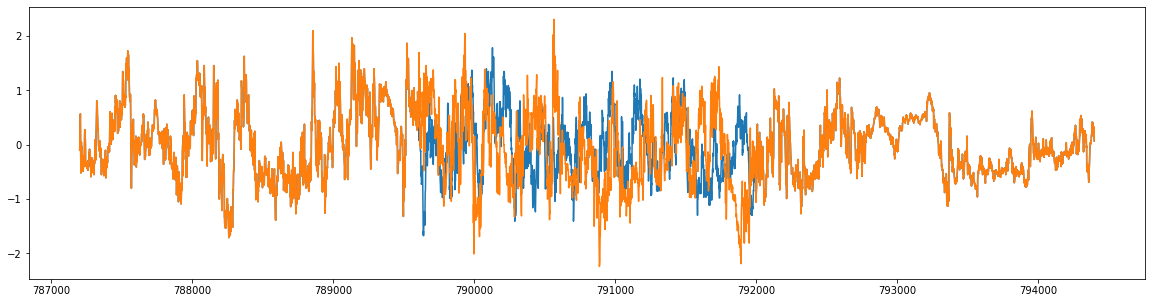

In [129]:
i=164
mean=24000
lg=2400
fig, ax1 = plt.subplots(figsize=(20, 5))
plt.plot(data_new[i*2*lg:i*2*lg+3*lg]['w'])
plt.plot(data[i*2*lg:i*2*lg+3*lg]['w'])
#plt.plot(data_new[i*mean:i*mean+mean]['w'])
#plt.plot(data[i*mean:i*mean+mean]['w'])


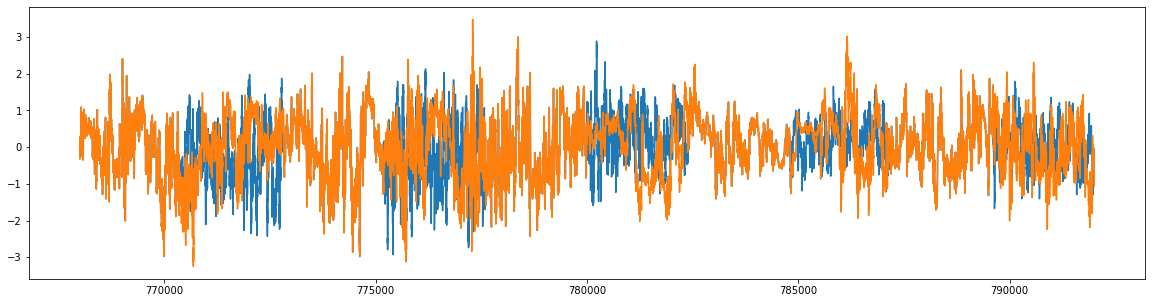

In [130]:
i=32
mean=24000
fig, ax1 = plt.subplots(figsize=(20, 5))
plt.plot(data_new[i*mean:i*mean+mean]['w'])
plt.plot(data[i*mean:i*mean+mean]['w'])


## Функции

In [2]:
def gapfilling(name, data_gap, var1, var2, start_gap, end_gap):
    
    lg = end_gap-start_gap
    T = data_gap[var1][start_gap-lg:end_gap+lg].values
    W = data_gap[var2][start_gap-lg:end_gap+lg].values
    
    #линейный тренд
    if name=='lin' or name=='lin_cov' or name=='lin_gaus':
        T_lin, W_lin = T.copy(), W.copy()
        T_lin[lg:-lg] = np.linspace(np.nanmean(T[:lg]),np.nanmean(T[-lg:]),lg)
        W_lin[lg:-lg] = np.linspace(np.nanmean(W[:lg]),np.nanmean(W[-lg:]),lg)
        T_new, W_new = T_lin[lg:2*lg], W_lin[lg:2*lg]
    
    #линейный тренд + нормальное распределение
    if name=='lin_gaus':
        T_lin_gaus, W_lin_gaus = T.copy(), W.copy()
        for i in range(lg,2*lg):
            dT, dW = T[i-lg:i+lg], W[i-lg:i+lg]
            not_nan = np.logical_not(np.isnan(dT))
            std_T = np.std(dT[not_nan])
            std_W = np.std(dW[not_nan])
            
            T_lin_gaus[i] = np.random.normal(T_lin[i], std_T)
            W_lin_gaus[i] = np.random.normal(W_lin[i], std_W)
        T_new, W_new = T_lin_gaus[lg:2*lg], W_lin_gaus[lg:2*lg]
    
    #линейный тренд + скоррелированное нормальное распределение
    if name=='lin_cov':
        T_lin_cov, W_lin_cov = T.copy(), W.copy()
        for i in range(lg,2*lg):
            dT, dW = T[i-lg:i+lg], W[i-lg:i+lg]
            not_nan = np.logical_not(np.isnan(dT))
            cov_TW = np.cov(dT[not_nan],dW[not_nan])
            T_lin_cov[i], W_lin_cov[i] = np.random.multivariate_normal((T_lin[i],W_lin[i]), cov_TW)
        T_new, W_new = T_lin_cov[lg:2*lg], W_lin_cov[lg:2*lg]
     
   #скользящее среднее 
    if name=='ma':
        T_ma, W_ma = T.copy(), W.copy()
        for i in range(lg,2*lg): 
            T_ma[i] = np.nanmean(T[i-lg:i+lg])
            W_ma[i] = np.nanmean(W[i-lg:i+lg])  
        T_new, W_new = T_ma[lg:2*lg], W_ma[lg:2*lg]

    #скользящее среднее + нормальное распределение
    if name=='ma_gaus':
        T_ma_gaus, W_ma_gaus = T.copy(), W.copy()
        for i in range(lg,2*lg):
            dT, dW = T[i-lg:i+lg], W[i-lg:i+lg]
            not_nan = np.logical_not(np.isnan(dT))
            T_ma = np.mean(dT[not_nan])
            W_ma = np.mean(dW[not_nan]) 
            std_T = np.std(dT[not_nan])
            std_W = np.std(dW[not_nan])
            
            T_ma_gaus[i] = np.random.normal(T_ma, std_T)
            W_ma_gaus[i] = np.random.normal(W_ma, std_W)
        T_new, W_new = T_ma_gaus[lg:2*lg], W_ma_gaus[lg:2*lg]
    
    #скользящее среднее + скоррелированное нормальное распределение
    if name=='ma_cov' or name=='walk_cov':
        T_ma_cov, W_ma_cov = T.copy(), W.copy()
        T_ma, W_ma = T.copy(), W.copy()
        for i in range(lg,2*lg):
            dT, dW = T[i-lg:i+lg], W[i-lg:i+lg]
            not_nan = np.logical_not(np.isnan(dT))
            T_ma[i] = np.mean(dT[not_nan])
            W_ma[i] = np.mean(dW[not_nan]) 
            cov_TW = np.cov(dT[not_nan],dW[not_nan])
            
            T_ma_cov[i], W_ma_cov[i] = np.random.multivariate_normal((T_ma[i],W_ma[i]), cov_TW)
        T_new, W_new = T_ma_cov[lg:2*lg], W_ma_cov[lg:2*lg]
    
    #приращения величин 
    if name=='walk' or name=='walk_cov': 
        delta_T, delta_W = T[:-1]-T[1:], W[:-1]-W[1:]
    
    #случайное блуждание в рамках трех сигм 
    if name == 'walk':
        T_walk, W_walk = T.copy(), W.copy()
        for i in range(lg,2*lg):
            std_delta_T = np.nanstd(delta_T[i-lg:i+lg])
            std_delta_W = np.nanstd(delta_W[i-lg:i+lg])
            std_T = np.nanstd(T[i-lg:i+lg])
            std_W = np.nanstd(W[i-lg:i+lg])
            T_ma = np.nanmean(T[i-lg:i+lg])
            W_ma = np.nanmean(W[i-lg:i+lg]) 

            dT = np.random.normal(0, std_delta_T)
            dW = np.random.normal(0, std_delta_W)
            T_walk[i] = T_walk[i-1]+dT
            W_walk[i] = W_walk[i-1]+dW
            if T_walk[i]>T_ma+3*std_T or T_walk[i]<T_ma-3*std_T: T_walk[i] = T_walk[i-1]-dT
            if W_walk[i]>W_ma+3*std_W or W_walk[i]<W_ma-3*std_W: W_walk[i] = W_walk[i-1]-dW
        T_new, W_new = T_walk[lg:2*lg], W_walk[lg:2*lg]
            
    #скоррелированное случайное блуждание в рамках скоррелированного нормального распределения
    if name == 'walk_cov':
        window = int(np.ceil(lg/200)) #окно шириной в 1% пропуска (не менее 1)
        
        T_walk_cov, W_walk_cov = T.copy(), W.copy()
        for i in range(lg,2*lg):
            
            dT, dW = delta_T[i-lg:i+lg], delta_W[i-lg:i+lg]
            not_nan = np.logical_not(np.isnan(dT))
            cov_delta_TW = np.cov(dT[not_nan],dW[not_nan])
            
            T_max, T_min = np.nanmax(T_ma_cov[i-window:i+window]), np.nanmin(T_ma_cov[i-window:i+window])
            W_max, W_min = np.nanmax(W_ma_cov[i-window:i+window]), np.nanmin(W_ma_cov[i-window:i+window])
            
            dT, dW = np.random.multivariate_normal((0,0), cov_delta_TW)
            
            T_walk_cov[i] = T_walk_cov[i-1]+dT
            W_walk_cov[i] = W_walk_cov[i-1]+dW
            if T_walk_cov[i]>T_max or T_walk_cov[i]<T_min: 
                if abs(T_walk_cov[i]-T_ma[i])>abs(T_walk_cov[i-1]-dT-T_ma[i]): T_walk_cov[i] = T_walk_cov[i-1]-dT
            if W_walk_cov[i]>W_max or W_walk_cov[i]<W_min: 
                if abs(W_walk_cov[i]-W_ma[i])>abs(W_walk_cov[i-1]-dW-W_ma[i]): W_walk_cov[i] = W_walk_cov[i-1]-dW
        T_new, W_new = T_walk_cov[lg:2*lg], W_walk_cov[lg:2*lg]
    
    return T_new, W_new

In [3]:
def gap_stat(X, X_out):
    not_nan = np.logical_not(np.isnan(X))
    X=X[not_nan]        
    acor = np.corrcoef(X[1:],X[:-1])
    print(np.mean(X), np.std(X), acor[0,1], np.max(X), np.min(X), file=X_out)

In [4]:
def ax_c(x,a,c):
    return a*x+c

def f_WT(W, T, file_WT):
    not_nan = np.logical_not(np.isnan(T))
    x = np.arange(len(T[not_nan]))

    coef_W, _ = curve_fit(ax_c, x, W[not_nan])
    coef_T, _ = curve_fit(ax_c, x, T[not_nan])

    lin_W = ax_c(np.arange(len(W)),*coef_W)
    lin_T = ax_c(np.arange(len(T)),*coef_T)

    #пульсации
    pW, pT = W-lin_W, T-lin_T

    #кинематический поток тепла
    print(np.nanmean(pT*pW), file=file_WT)
    #return np.nanmean(pT*pW)

## Отрисовка метода walk_cov

In [249]:
start_gap = index_s[-1]
end_gap = index_e[-1]
lg = end_gap-start_gap
T = data_gap['T'][start_gap-lg:end_gap+lg].values
W = data_gap['w'][start_gap-lg:end_gap+lg].values
    

T_ma_cov, W_ma_cov = T.copy(), W.copy()
T_ma, W_ma = T.copy(), W.copy()
for i in range(lg,2*lg):
    dT, dW = T[i-lg:i+lg], W[i-lg:i+lg]
    not_nan = np.logical_not(np.isnan(dT))
    T_ma[i] = np.mean(dT[not_nan])
    W_ma[i] = np.mean(dW[not_nan]) 
    cov_TW = np.cov(dT[not_nan],dW[not_nan])

    T_ma_cov[i], W_ma_cov[i] = np.random.multivariate_normal((T_ma[i],W_ma[i]), cov_TW)


T_max, T_min = T.copy(), T.copy()
W_max, W_min = W.copy(), W.copy()
window = int(np.ceil(lg/200)) #окно шириной в 1% пропуска (не менее 1)

delta_T, delta_W = T[:-1]-T[1:], W[:-1]-W[1:]

T_walk_cov, W_walk_cov = T.copy(), W.copy()
for i in range(lg,2*lg):

    dT, dW = delta_T[i-lg:i+lg], delta_W[i-lg:i+lg]
    not_nan = np.logical_not(np.isnan(dT))
    cov_delta_TW = np.cov(dT[not_nan],dW[not_nan])

    T_max[i], T_min[i] = np.nanmax(T_ma_cov[i-window:i+window]), np.nanmin(T_ma_cov[i-window:i+window])
    W_max[i], W_min[i] = np.nanmax(W_ma_cov[i-window:i+window]), np.nanmin(W_ma_cov[i-window:i+window])
    
    #std_delta_T = np.nanstd(delta_T[i-lg:i+lg])
    #std_delta_W = np.nanstd(delta_W[i-lg:i+lg])
    #dT = np.random.normal(0, std_delta_T)
    #dW = np.random.normal(0, std_delta_W)

    dT, dW = np.random.multivariate_normal((0,0), cov_delta_TW)

    T_walk_cov[i] = T_walk_cov[i-1]+dT
    W_walk_cov[i] = W_walk_cov[i-1]+dW
    if T_walk_cov[i]>T_max[i] or T_walk_cov[i]<T_min[i]: 
        if abs(T_walk_cov[i]-T_ma[i])>abs(T_walk_cov[i-1]-dT-T_ma[i]): T_walk_cov[i] = T_walk_cov[i-1]-dT
    if W_walk_cov[i]>W_max[i] or W_walk_cov[i]<W_min[i]: 
        if abs(W_walk_cov[i]-W_ma[i])>abs(W_walk_cov[i-1]-dW-W_ma[i]): W_walk_cov[i] = W_walk_cov[i-1]-dW
        


C:\Users\user\AppData\Local\Temp/ipykernel_5300/1257677435.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','01:57:00','01:57:10','01:57:20','01:57:30','01:57:40','01:57:50','01:58:00'])


Text(0.5, 0, '$Time,$ $UTC$')

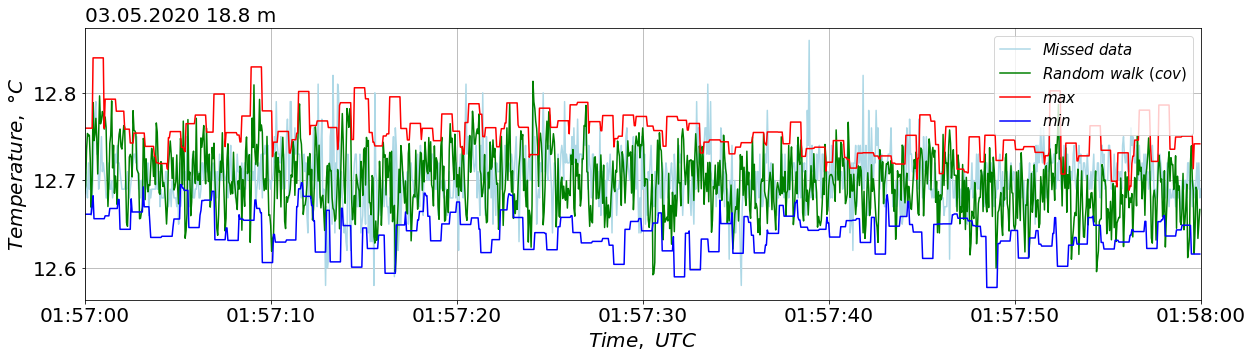

In [260]:
i=-1
fig, ax1 = plt.subplots(figsize=(20, 5))
T=data['T'][index_s[i]:index_e[i]+1].values
ax1.plot(T, label='$Missed$ $data$', color='lightblue')
#ax1.plot(data_gap['T'][index_s[i]-lg:index_e[i]+lg], label='$Data$ $for$ $gapfilling$', color='darkblue')

#ax1.plot(T_ma_cov[1200:2400], label='$walk$', color='lightgreen')

ax1.plot(T_walk_cov[1200:2400], label='$Random$ $walk$ $(cov)$', color='green')

plt.plot(T_max[1200:2400], label='$max$', color='red')
plt.plot(T_min[1200:2400], label='$min$', color='blue')
#plt.plot(T_ma[1200:2400], label='', color='darkgreen')

ax1.legend(fontsize=15)
ax1.grid()
ax1.margins(x=0)
ax1.tick_params(axis='both', labelsize=20) #, pad=40.0
ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax1.set_xticklabels(['','01:57:00','01:57:10','01:57:20','01:57:30','01:57:40','01:57:50','01:58:00'])
ax1.set_title('03.05.2020 18.8 m', fontsize = 20,loc='left')
ax1.set_ylabel('$Temperature,$ $°С$', fontsize=20)#, labelpad=50
ax1.set_xlabel('$Time,$ $UTC$', fontsize=20) #, labelpad=30